# Titanic Kaggle Project

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
# reading data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
display(train_data.head(), train_data.shape, test_data.head(), test_data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

In [3]:
# copying data to another variable
df_train = train_data.copy()
df_test = test_data.copy()

In [4]:
# checking info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking info the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**observations**
- There are 5 object type columns (Name, Sex, Ticket, Cabin and Embarked)
- There are 3 columns with null values (Age, Cabin and Embarked)

### Exploring null values

In [6]:
# number of null values for each column
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# percentage of null values in each column
df_train.isnull().sum()*100/len(df_train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**observations:**
- The 'Age' column has ~20% of missing values
- The 'Cabin' column has ~80% of missing values (way to high)
- the 'Embarked' column has ~0.2% of missing values

### What to do with each of these columns?
**For the Age column**
- I can just fill the null values with the median age
-------
**For the Cabin column**
- Since the majority of values in the column are null, I'll just drop the entire column
--------
**For the Embarked column**
- I can just replace the null values by the mode of the column

In [8]:
# function to replace the null values
def null_filler(dataframe):
    dataframe['Age'] = dataframe['Age'].fillna(df_train['Age'].median())
    dataframe = dataframe.drop(['Cabin'], axis=1)
    dataframe['Embarked'] = dataframe['Embarked'].fillna(df_train['Embarked'].mode().loc[0])
    for column in dataframe.columns:
        if dataframe[column].isnull().sum() > 0:
            dataframe[column] = bdataframe[column].fillna(df_train[column].mode().loc[0])
    return dataframe

In [9]:
# dealing with null values from df_train
df_train = null_filler(df_train)
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# dealing with null values from df_test
df_test = null_filler(df_test)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Null values have been dealt with**
## Exploratory Data Analysis (EDA)

In [11]:
# separating numerical and categorical columns
numerical_cols = df_train.select_dtypes(['float64', 'int64']).columns.tolist()
categorical_cols = df_train.select_dtypes(['object']).columns.tolist()
print(numerical_cols, categorical_cols)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] ['Name', 'Sex', 'Ticket', 'Embarked']


Column: PassengerId


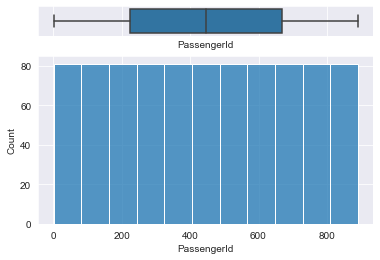

Column: Survived


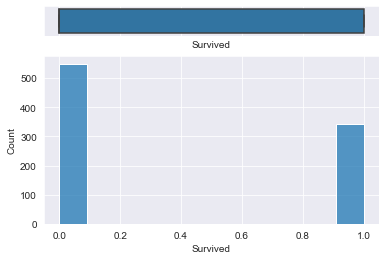

Column: Pclass


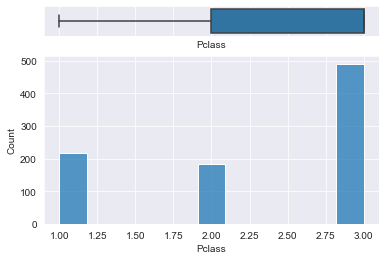

Column: Age


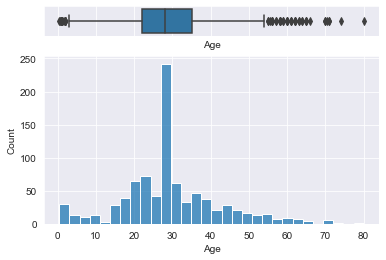

Column: SibSp


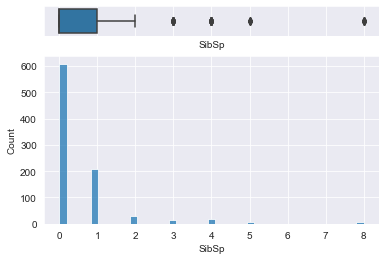

Column: Parch


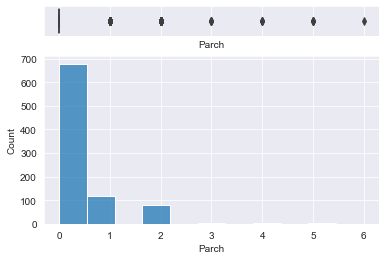

Column: Fare


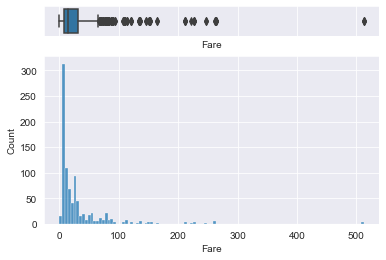

In [17]:
for column in numerical_cols:
    print('Column:', column)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
    sns.boxplot(x=column, data=df_train, ax=ax_box)
    sns.histplot(x=column, data=df_train, ax=ax_hist)
    ax_box.set(xlabel=column)
    plt.show()